# Introduction :

The data set I choice for This project is "Covid-19 India Statewise Data".

This Dataset contain Statewise Number of Total cases, Active cases, Total Discharge,Deaths, active ratio(%), Discharge ratio (%), Death Ratio(%). I found This dataset From Kaggel. 

# Question about this dataset:

1. Which State has Maximum cases ?
2. Define the death ratio for each state
3. Plot a Heatmap
4. Find the total death of each state

# Module use for This Project:
1. Pandas
2. Numpy
3. Seaborn
4. Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data Frame

In [91]:
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
2,Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
3,Tamil Nadu,2535402,27897,2473781,33724,1.10,97.57,1.33
4,Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68


In [3]:
df.shape

(36, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
# Data size
df.size

288

In [6]:
# Checking Data Types
df.dtypes

State/UTs               object
Total Cases              int64
Active                   int64
Discharged               int64
Deaths                   int64
Active Ratio (%)       float64
Discharge Ratio (%)    float64
Death Ratio (%)        float64
dtype: object

In [7]:
# Cheacking unique values
df.nunique()

State/UTs              36
Total Cases            36
Active                 36
Discharged             36
Deaths                 36
Active Ratio (%)       35
Discharge Ratio (%)    36
Death Ratio (%)        30
dtype: int64

### Cleaning Unusal data

In [8]:
# CHecking Null value
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

Here we Do not found any missing value to replace or delete

In [9]:
# Checking duplicate values
df.duplicated().sum()

0

Here we Do not found any Duplicate data 

In [92]:
df.rename(columns={"State/UTs":"State","Active Ratio (%)":"ActiveRatio", "Discharge Ratio (%)":"DischargeRatio","Death Ratio (%)":"DeathRatio" },inplace=True)
df.head()

,State,Total Cases,Active,Discharged,Deaths,ActiveRatio,DischargeRatio,DeathRatio
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
2,Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
3,Tamil Nadu,2535402,27897,2473781,33724,1.10,97.57,1.33
4,Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68


### Analysing data

In [11]:
# Statistic values for this data
df.describe()

,Total Cases,Active,Discharged,Deaths,ActiveRatio,DischargeRatio,Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.651175e+05,11712.916667,8.419016e+05,11503.000000,2.572778,96.167778,1.260000
std,1.244523e+06,27062.566710,1.202299e+06,21914.699427,4.495239,4.393510,0.562926
min,7.510000e+03,16.000000,7.365000e+03,4.000000,0.030000,77.720000,0.040000
25%,6.076375e+04,567.250000,5.888850e+04,788.750000,0.155000,96.137500,0.932500
50%,4.469820e+05,1412.000000,4.328515e+05,5028.500000,0.770000,97.830000,1.330000
75%,9.657078e+05,9713.000000,9.536130e+05,13223.000000,2.300000,98.495000,1.627500
max,6.214190e+06,125535.000000,5.980350e+06,127031.000000,21.840000,99.790000,2.710000


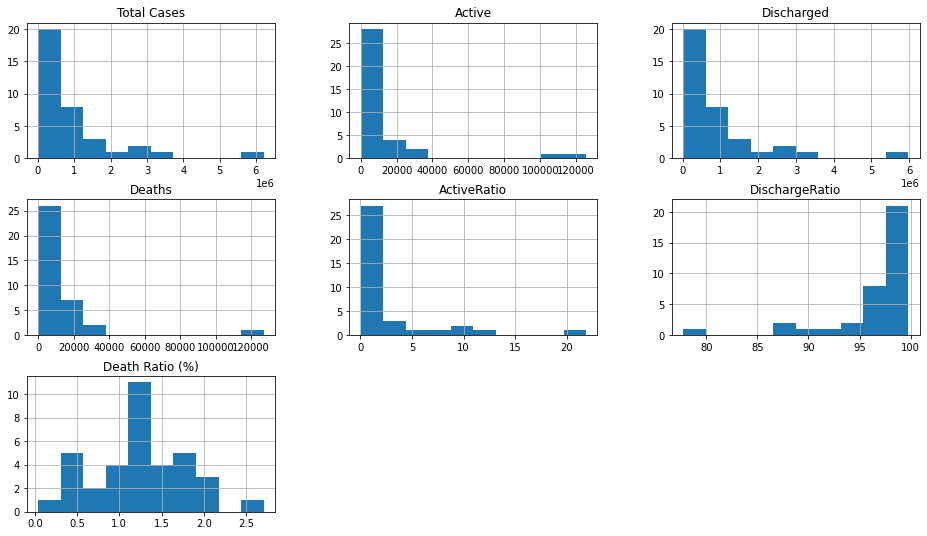

In [12]:
df.hist(figsize=(16,9))
plt.show()

# Exploration and Visualization with Conclusion

In [13]:
df.groupby(by="State").sum().head(5)

,Total Cases,Active,Discharged,Deaths,ActiveRatio,DischargeRatio,Death Ratio (%)
State,,,,,,,
Andaman and Nicobar,7510,16,7365,129,0.21,98.07,1.72
Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68
Arunachal Pradesh,42820,4211,38407,202,9.83,89.69,0.47
Assam,547283,17815,524469,4999,3.26,95.83,0.91
Bihar,723945,725,713591,9629,0.10,98.57,1.33


##### 1. Which State has Maximum cases ?

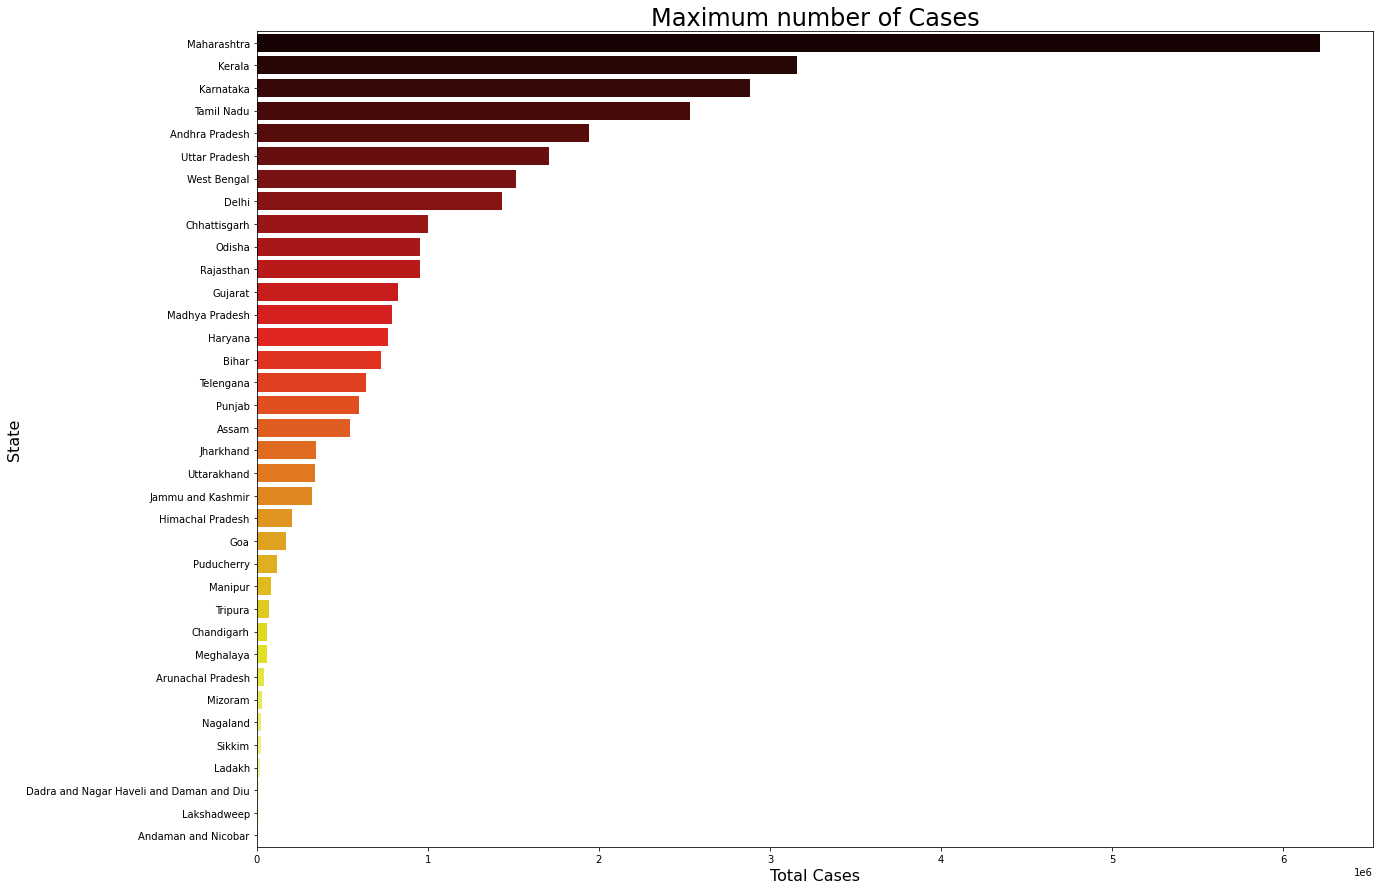

In [59]:
plt.figure(figsize=(20,15))
sns.barplot(x="Total Cases", y = "State",palette="hot",data=df)
plt.title("Maximum number of Cases", fontsize = 24)
plt.xlabel("Total Cases", fontsize=16)
plt.ylabel("State", fontsize=16)
plt.show()

Conclusion of Question No 1. From this plot We can Easily Define That "MAHARASTRA" has Miximum Number of Cases and "ANDAMAN AND NICOBAR" Has minimum Number of Cases accoriding This dataset.

##### 2. Define the death ratio for each state

In [23]:
df.head(5)

,State,Total Cases,Active,Discharged,Deaths,ActiveRatio,DischargeRatio,DeathRatio
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
2,Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
3,Tamil Nadu,2535402,27897,2473781,33724,1.10,97.57,1.33
4,Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68


<ipython-input-58-36d778bbf47a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Death Ratio", Fontsize = 15)
<ipython-input-58-36d778bbf47a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("State", Fontsize = 15)


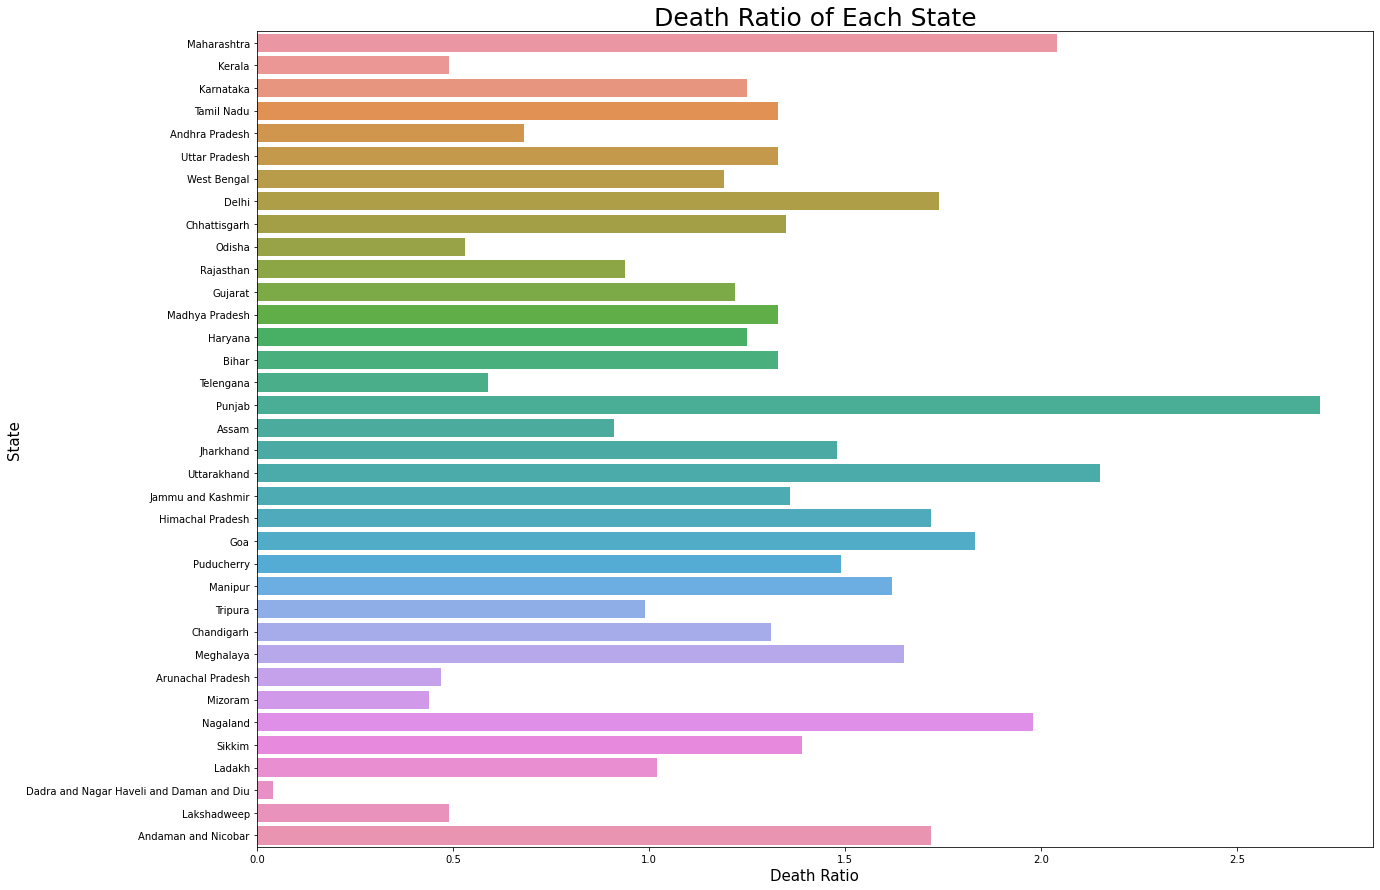

In [58]:
plt.figure(figsize=(20,15))
x= "DeathRatio"
y = "State"
sns.barplot(x ="DeathRatio", y = "State", data = df)
plt.title("Death Ratio of Each State", fontsize = 25)
plt.xlabel("Death Ratio", Fontsize = 15)
plt.ylabel("State", Fontsize = 15)
plt.show()


Conclusion For question No 2. From The above graph We can easily Visualize Death Ratio for each State. Maximum Death ratio and minimum death ratio ploted in This Graph

##### 3.Plot a Heatmap

In [80]:
df.set_index("State",inplace=True)
df.head(5)

,Total Cases,Active,Discharged,Deaths,ActiveRatio,DischargeRatio,DeathRatio
State,,,,,,,
Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49
Karnataka,2883947,29314,2818476,36157,1.02,97.73,1.25
Tamil Nadu,2535402,27897,2473781,33724,1.10,97.57,1.33
Andhra Pradesh,1940096,24708,1902256,13132,1.27,98.05,0.68


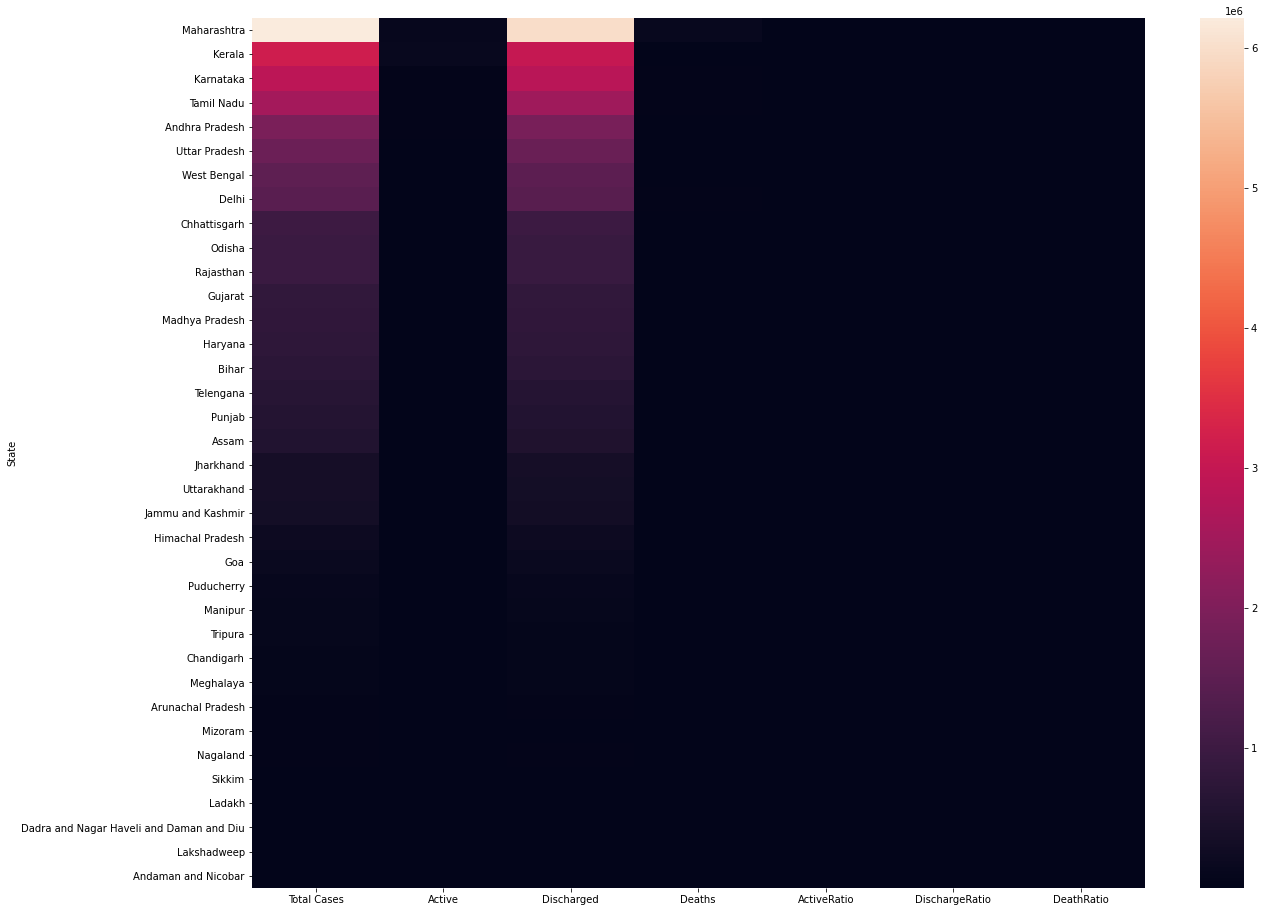

In [75]:
plt.figure(figsize=(20,16))
sns.heatmap(df)
plt.show()

In [82]:
df = pd.read_csv("Latest Covid-19 India Status.csv")
df.headad(2)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6214190,106809,5980350,127031,1.72,96.24,2.04
1,Kerala,3160937,125535,3020052,15350,3.97,95.54,0.49


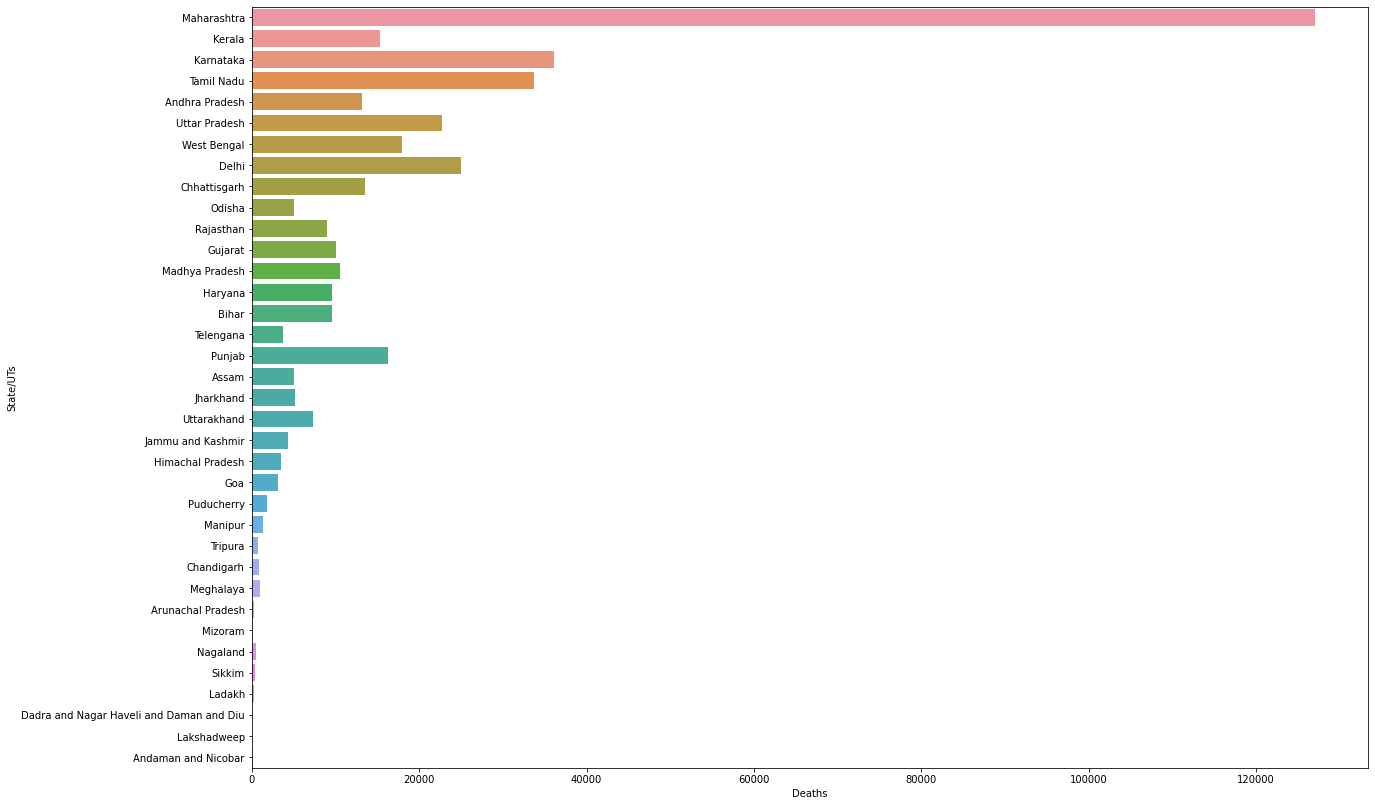

In [89]:
plt.figure(figsize=(20,14))
sns.barplot(x="Deaths",y="State/UTs",data=df)
plt.show()

Conclusion of Question No 4 : Maharastra have Maximum number of Death